In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set(
    rc={
    'figure.figsize':(11.7,8.27),
    }
)

In [2]:
demogs2 = pd.read_csv('data/census_brgy.txt', delim_whitespace = True)
demogs2.head()

,barangay,pop_2000,pop_2010,annual_growth_rate,hhold_pop,num_hholds,ave_hhold_size,median_age,land_area,pop_density
0,Adlaon,"2,847","3,647",2.51,"3,647",848,4.3,23,7.46,489
1,Agsungot,"1,746","1,981",1.27,"1,981",461,4.3,23,6.29,315
2,Apas,"15,492","22,566",3.83,"22,463","4,925",4.6,24,0.49,"46,053"
3,Bacayan,"8,604","14,021",5.00,"14,021","3,286",4.3,24,1.22,"11,493"
4,Banilad,"5,220","9,903",6.61,"9,299","2,003",4.6,25,1.51,"6,558"


In [3]:
# convert these cols to int64
int_cols = ['pop_2000', 'pop_2010', 'hhold_pop', 'num_hholds']
int_cols_dict = {k: 'int64' for k in int_cols}
demogs2[int_cols] = demogs2[int_cols].apply(lambda x: x.str.replace(',', ''))
demogs2[int_cols] = demogs2[int_cols].astype(int_cols_dict)
demogs2['barangay'] = demogs2.barangay.str.strip().str.replace('_', ' ')
demogs2['pop_density'] = demogs2.pop_2010/demogs2.land_area


In [4]:
data = pd.read_csv("data/cebu_hh_survey_2011.txt", delim_whitespace=True)
# remove underscore
data['barangay'] = data.barangay.str.replace('_', ' ')
data.head()


,barangay,hh_id,hh_size,organic,paper,plastic,metal,others,total,av_kg_per_day,av_g_per_day
0,Capitol Site,H/H/1,7,5.25,2.25,2.25,0.0,0.0,9.75,1.39,"1,390"
1,Capitol Site,H/H/2,4,6.50,2.50,2.25,0.0,5.0,16.25,2.32,"2,320"
2,Capitol Site,H/H/3,6,6.50,2.00,2.00,0.0,7.0,17.50,2.50,"2,500"
3,Capitol Site,H/H/4,3,8.25,2.00,2.25,0.0,0.0,12.50,1.79,"1,790"
4,Capitol Site,H/H/5,9,9.00,2.00,2.00,0.0,0.0,13.00,1.86,"1,860"


In [5]:
merged = pd.merge(data, demogs2[['barangay', 'pop_2010', 'pop_density', 'num_hholds', 'land_area', 'ave_hhold_size']], on = 'barangay', how= 'inner')
merged.head()

,barangay,hh_id,hh_size,organic,paper,plastic,metal,others,total,av_kg_per_day,av_g_per_day,pop_2010,pop_density,num_hholds,land_area,ave_hhold_size
0,Capitol Site,H/H/1,7,5.25,2.25,2.25,0.0,0.0,9.75,1.39,"1,390",15308,18668.292683,3801,0.82,4.0
1,Capitol Site,H/H/2,4,6.50,2.50,2.25,0.0,5.0,16.25,2.32,"2,320",15308,18668.292683,3801,0.82,4.0
2,Capitol Site,H/H/3,6,6.50,2.00,2.00,0.0,7.0,17.50,2.50,"2,500",15308,18668.292683,3801,0.82,4.0
3,Capitol Site,H/H/4,3,8.25,2.00,2.25,0.0,0.0,12.50,1.79,"1,790",15308,18668.292683,3801,0.82,4.0
4,Capitol Site,H/H/5,9,9.00,2.00,2.00,0.0,0.0,13.00,1.86,"1,860",15308,18668.292683,3801,0.82,4.0


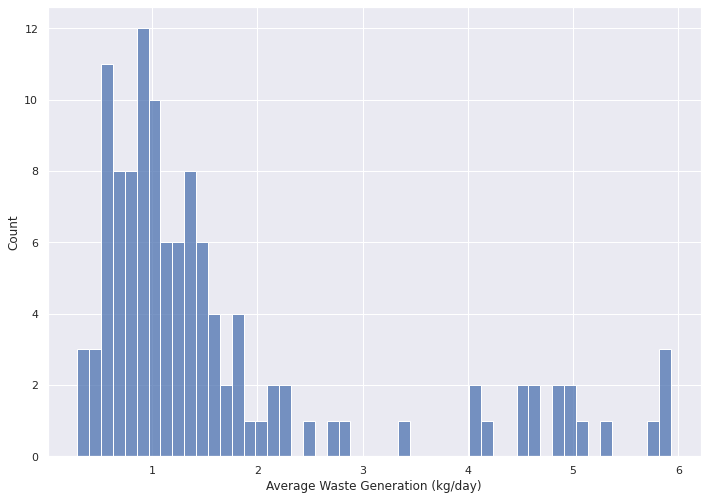

In [6]:
ax = sns.histplot(data=data, x = 'av_kg_per_day', bins = 50)
ax.set_xlabel('Average Waste Generation (kg/day)')
plt.show()

On average, organics comprise the highest waste generation

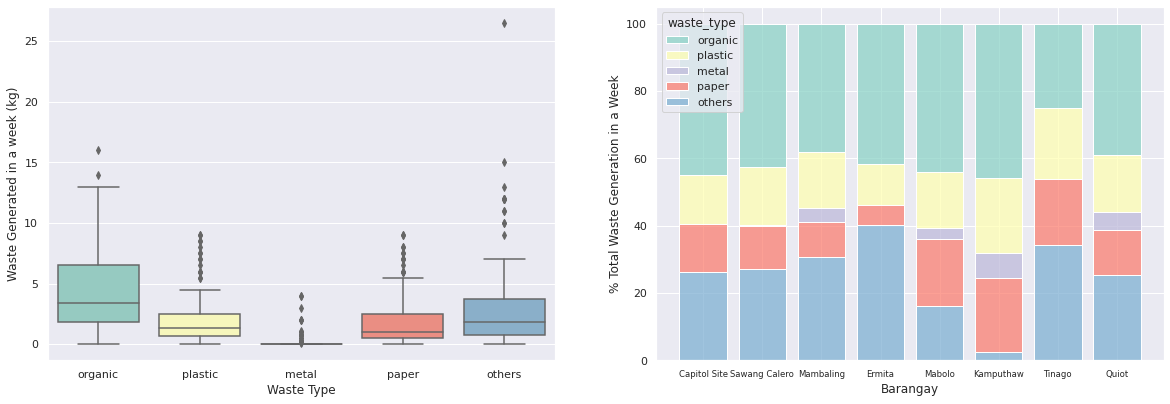

In [7]:
waste_type = pd.melt(data, id_vars = ['barangay', 'hh_id'],  
value_vars=['organic', 'plastic', 'metal', 'paper', 'others'], 
var_name = 'waste_type', value_name = 'weight')
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,6.5)
# waste generation plot per waste type
sns.boxplot(data = waste_type, x = 'waste_type', y= 'weight', palette = 'Set3', ax = axs[0])
axs[0].set_ylabel('Waste Generated in a week (kg)')
axs[0].set_xlabel('Waste Type')

# waste generation per barangay per waste type
waste_type = waste_type.assign(
    sum_wt = lambda x: x.groupby(['barangay', 'waste_type'])['weight'].transform('sum'),
    wt_total_brgy = lambda x: x.groupby(['barangay'])['weight'].transform('sum'),
    pct = lambda x: x['sum_wt']/x['wt_total_brgy'] * 100
)
g = sns.histplot(waste_type[['barangay', 'waste_type', 'pct']].drop_duplicates(), 
x = 'barangay', hue = 'waste_type', weights = 'pct', multiple='stack',
palette = 'Set3', shrink = 0.8, ax = axs[1])
axs[1].set_ylabel('% Total Waste Generation in a Week')
axs[1].set_xlabel('Barangay')
axs[1].tick_params(axis = 'x', labelsize = 8.5)
plt.show()


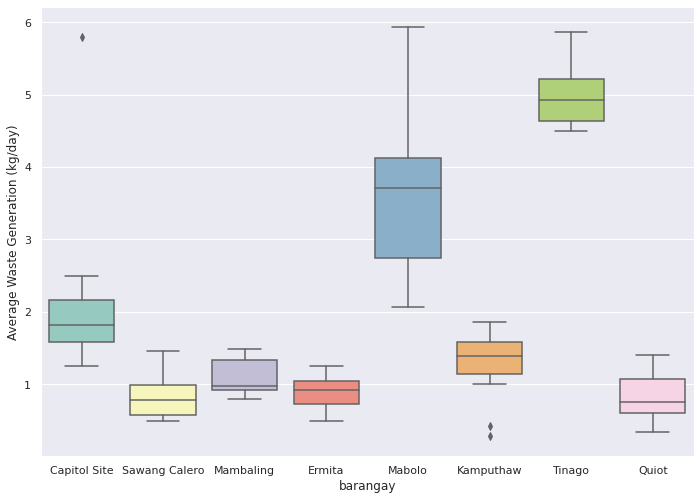

In [8]:
ax = sns.boxplot(data = data, x = 'barangay', y = 'av_kg_per_day', palette = 'Set3')
ax.set_ylabel('Average Waste Generation (kg/day)')
plt.show()

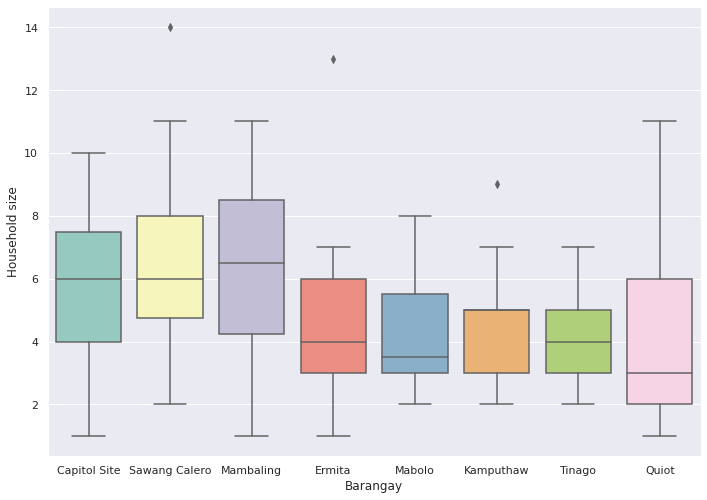

In [9]:
ax = sns.boxplot(data = data, x="barangay", y= 'hh_size', palette='Set3')
ax.set(xlabel = 'Barangay', ylabel = 'Household size')
plt.show()

We look at relating household size with with total waste generation.

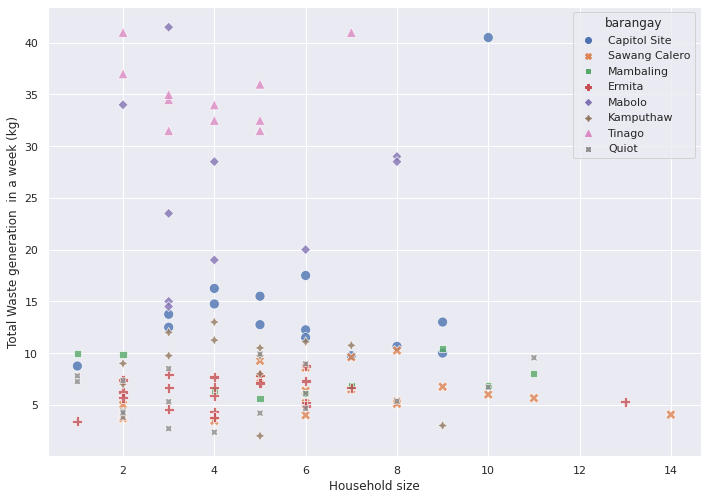

In [10]:
ax = sns.scatterplot(data = data, x = 'hh_size', y = 'total', hue = 'barangay', s= 100, alpha = 0.8, style = 'barangay')
ax.set(xlabel = 'Household size', ylabel = 'Total Waste generation  in a week (kg)')
plt.show()

There seems to be no clear relationship between the population of a locale to the total generation of waste.

In [11]:
tmp = merged.groupby(['barangay', 'pop_2010'], as_index = False) \
            .agg({'av_kg_per_day': ['mean', 'std']})

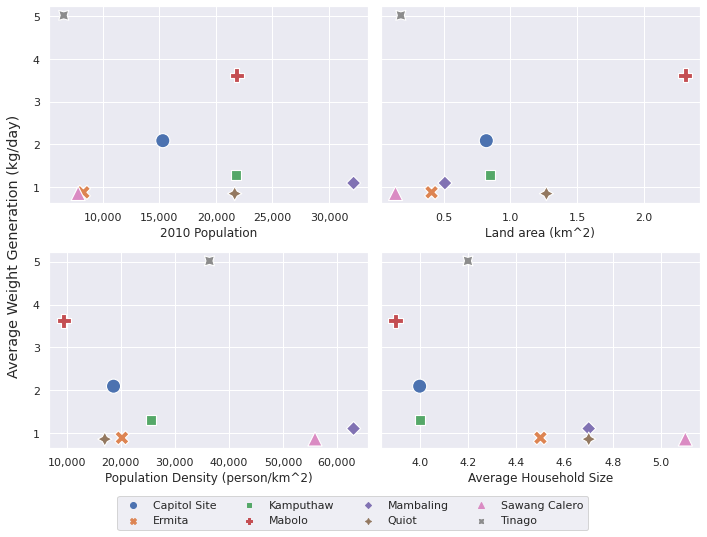

In [34]:
vars  = ['pop_2010', 'land_area', 'pop_density', 'ave_hhold_size']
x_labels = ['2010 Population', 'Land area (km^2)', 'Population Density (person/km^2)', 'Average Household Size']
fig, axs = plt.subplots(2,2, figsize = (10, 7),sharey= True)
# plt.ylabel('Average Weight Generation (kg/day)')
for ax, v, x_lab in zip(axs.reshape(-1), vars, x_labels):
    tmp = merged.groupby(['barangay', v], as_index = False) \
            .agg({'av_kg_per_day': ['mean', 'std']})
    tmp.columns = list(map(''.join, tmp.columns.values))
    sns.scatterplot(x = v, y = 'av_kg_per_daymean', data = tmp, s= 200,
    hue = 'barangay', style = 'barangay', ax = ax)
    ax.get_legend().set_visible(False)
    ax.set_xlabel(x_lab)
    ax.set_ylabel(None)
    if v in ['pop_2010', 'pop_density']:
        ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
handles, labels= ax.get_legend_handles_labels()
# _overlay = fig.add_subplot(111, frameon = False)
# # _overlay.set_visible(False)
# plt.tick_params(labelcolor = 'none', which = 'both', top=False, bottom=False, left=False, right=False)
# plt.ylabel('Average Weight Generation (kg/day)', fontsize = 15)
fig.supylabel('Average Weight Generation (kg/day)')
fig.legend(handles, labels, loc = 'lower center', ncol = 4, bbox_to_anchor = (0.5, -0.075))
fig.tight_layout()
plt.show()
